In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import time
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import numpy as np
import matplotlib.pyplot as plt
import squarify
import random

In [2]:
jobs_results = pd.read_csv("../../Data/jobs_results_with_coords.csv")

display(jobs_results.shape)
display(jobs_results.head())

(591, 15)

,title,company_name,location,via,description,qualifications,responsibilities,benefits,job_id,search_name,search_location,schedule_type,category,latitude,longitude
0,Senior Blockchain Software Engineer,Truist,Anywhere,via ZipRecruiter,The position is described below. If you want t...,Language Fluency: English (Required)\nThe requ...,Deliver highly complex solutions with signific...,General Description of Available Benefits for ...,eyJqb2JfdGl0bGUiOiJTZW5pb3IgQmxvY2tjaGFpbiBTb2...,block-chain-1,USA,Full-time,Block Chain,NaN,NaN
1,Get twitter accounts that are tied to blockcha...,Upwork,Anywhere,via Upwork,I am looking for a list of blockchain addresse...,NaN,NaN,NaN,eyJqb2JfdGl0bGUiOiJHZXQgdHdpdHRlciBhY2NvdW50cy...,block-chain-1,USA,Contractor,Block Chain,NaN,NaN
2,Blockchain Analyst,Allium,"New York, New York",via Jobs,About the role\n• Sherlock & Enola Holmes leve...,Ability to parse and understand EVM (and/or So...,Tackling interesting problems - we are ingesti...,An accelerated growth trajectory - you will ha...,eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIEFuYWx5c3QiLC...,block-chain-1,USA,Full-time,Block Chain,40.712728,-74.006015
3,Full Stack Blockchain Engineer,geojam,"Los Angeles, California",via AngelList,"Who We Are\n\nLaunched in 2020, Geojam is a so...",We’re looking for a capable generalist enginee...,You will be designing and building our core so...,"We’re wrapping up our presale for $JAM, so you...",eyJqb2JfdGl0bGUiOiJGdWxsIFN0YWNrIEJsb2NrY2hhaW...,block-chain-1,USA,Full-time,Block Chain,34.053691,-118.242766
4,Blockchain Engineer - Apps Platform at Exodus ...,Exodus,"Livermore, California","via Livermore, CA - Geebo",Exodus is looking for a detail-orientated Bloc...,NaN,NaN,NaN,eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIEVuZ2luZWVyIC...,block-chain-1,USA,Full-time,Block Chain,37.682058,-121.768053


In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

nltk.download('stopwords')
nltk.download('punkt')

# Assuming you have a pandas DataFrame called 'jobs_results'
# with a column named 'description'

# Function to clean and preprocess text
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W|\d', ' ', text)
    
    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    return words

# Combine all descriptions into a single list of words
all_words = []
for desc in jobs_results['description']:
    words = preprocess_text(desc)
    all_words.extend(words)

# Count word frequencies
word_freq = Counter(all_words)

# Sort words by frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Display the tag cloud
for word, freq in sorted_words:
    print(f"{word}: {freq}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/victor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/victor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


data: 3736
experience: 3229
learning: 2126
work: 1672
team: 1415
machine: 1284
business: 1008
software: 1003
development: 998
skills: 942
science: 900
years: 869
cloud: 829
including: 823
research: 795
solutions: 784
engineering: 773
models: 729
technical: 728
new: 726
computer: 708
information: 705
design: 684
related: 672
deep: 672
knowledge: 643
ability: 641
analysis: 639
develop: 627
support: 623
working: 615
one: 614
benefits: 613
time: 612
position: 607
requirements: 599
systems: 596
ai: 586
role: 584
based: 583
us: 582
company: 579
world: 577
technology: 575
opportunity: 564
tools: 560
ml: 544
analytics: 537
management: 536
strong: 531
status: 522
job: 515
degree: 511
using: 492
required: 491
environment: 491
qualifications: 479
technologies: 463
range: 463
employees: 460
provide: 455
health: 454
help: 444
employment: 443
services: 437
teams: 436
applications: 430
python: 427
problems: 425
build: 422
may: 415
product: 414
well: 414
projects: 409
disability: 404
blockchain: 402
a

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/victor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/victor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


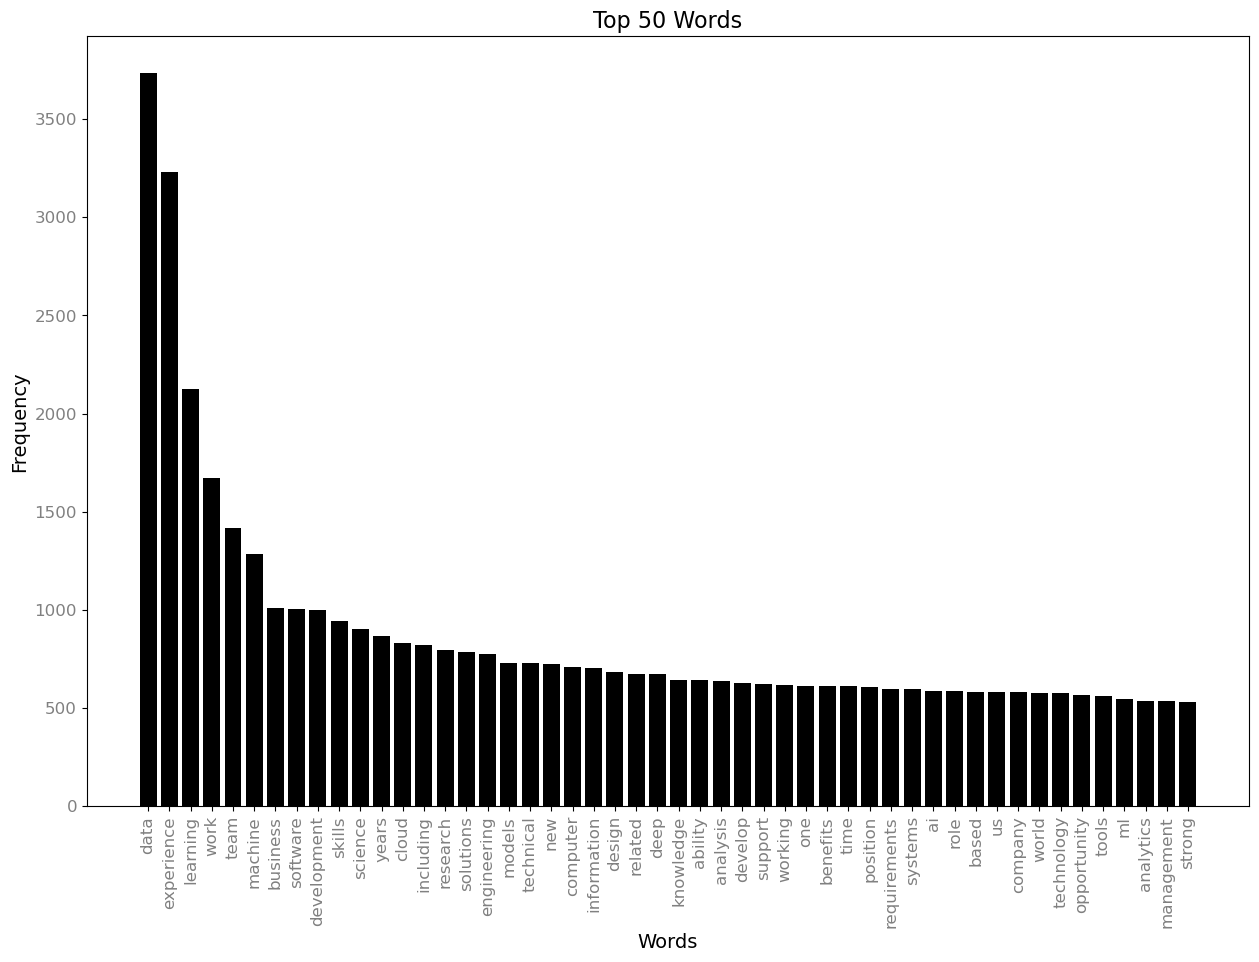

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

# Assuming you have a pandas DataFrame called 'jobs_results'
# with a column named 'description'

# Function to clean and preprocess text
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W|\d', ' ', text)
    
    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    return words

# Combine all descriptions into a single list of words
all_words = []
for desc in jobs_results['description']:
    words = preprocess_text(desc)
    all_words.extend(words)

# Count word frequencies
word_freq = Counter(all_words)

# Sort words by frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Get the top 50 words
top_words = sorted_words[:50]

# Create a bar plot
words, frequencies = zip(*top_words)
plt.figure(figsize=(15, 10))
plt.bar(words, frequencies, color='black')
plt.xticks(rotation=90, fontsize=12, color='grey')
plt.yticks(fontsize=12, color='grey')
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 50 Words', fontsize=16)
plt.show()


In [5]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

nltk.download('stopwords')
nltk.download('punkt')

# Assuming you have a pandas DataFrame called 'jobs_results'
# with a column named 'description'

# Function to clean and preprocess text
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W|\d', ' ', text)
    
    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    return words

# Combine all descriptions into a single list of words
all_words = []
for desc in jobs_results['description']:
    words = preprocess_text(desc)
    all_words.extend(words)

# Count word frequencies
word_freq = Counter(all_words)

# Sort words by frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Get the top 50 words
top_words = sorted_words[:50]

# Display the tag cloud
output = ''
for word, freq in top_words:
    output += f"{word} ({freq}) "
print(output)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/victor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/victor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


data (3736) experience (3229) learning (2126) work (1672) team (1415) machine (1284) business (1008) software (1003) development (998) skills (942) science (900) years (869) cloud (829) including (823) research (795) solutions (784) engineering (773) models (729) technical (728) new (726) computer (708) information (705) design (684) related (672) deep (672) knowledge (643) ability (641) analysis (639) develop (627) support (623) working (615) one (614) benefits (613) time (612) position (607) requirements (599) systems (596) ai (586) role (584) based (583) us (582) company (579) world (577) technology (575) opportunity (564) tools (560) ml (544) analytics (537) management (536) strong (531) 


### tag cloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/victor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/victor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


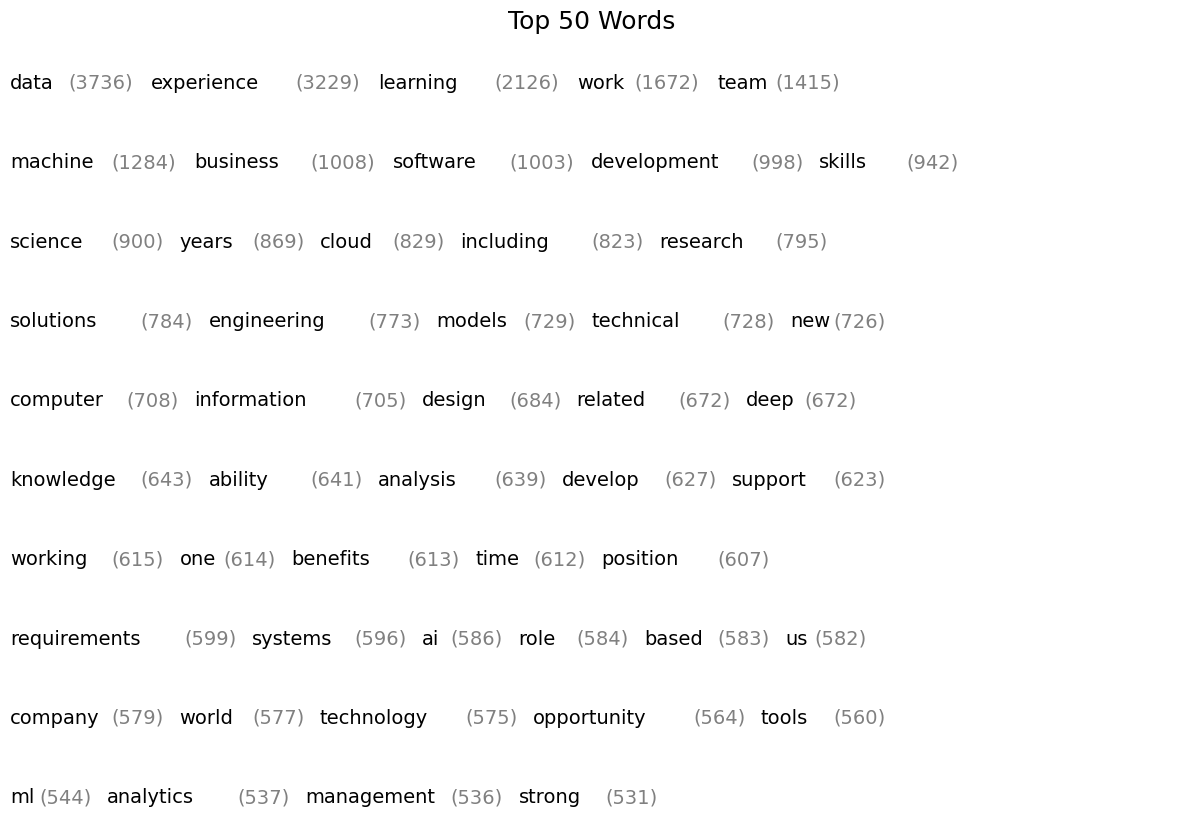

In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

# Assuming you have a pandas DataFrame called 'jobs_results'
# with a column named 'description'

# Function to clean and preprocess text
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W|\d', ' ', text)
    
    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    return words

# Combine all descriptions into a single list of words
all_words = []
for desc in jobs_results['description']:
    words = preprocess_text(desc)
    all_words.extend(words)

# Count word frequencies
word_freq = Counter(all_words)

# Sort words by frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Get the top 50 words
top_words = sorted_words[:50]

# Function to split top_words into rows with similar length
def split_words_into_rows(words, max_width):
    rows = []
    row = []
    row_width = 0

    for word, freq in words:
        word_width = len(word) + len(str(freq)) + 4
        if row_width + word_width > max_width:
            rows.append(row)
            row = []
            row_width = 0
        
        row.append((word, freq))
        row_width += word_width

    if row:
        rows.append(row)

    return rows

# Split the top 50 words into rows with similar length
max_row_width = 80
rows = split_words_into_rows(top_words, max_row_width)

# Create the visualization
fig, ax = plt.subplots(figsize=(15, 10))

y = 0
for row in rows[::-1]:
    x = 0
    for word, freq in row:
        ax.text(x, y, word, fontsize=14, color='black', ha='left', va='bottom')
        x += len(word) * 14 * 0.6
        ax.text(x, y, f'({freq})', fontsize=14, color='grey', ha='left', va='bottom')
        x += len(str(freq)) * 14 * 0.6 + 14
    y += 20

ax.set_xlim(0, max_row_width * 14 * 0.6)
ax.set_ylim(0, (len(rows) - 1) * 20 + 14)
ax.axis('off')
plt.title('Top 50 Words', fontsize=18)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/victor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/victor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


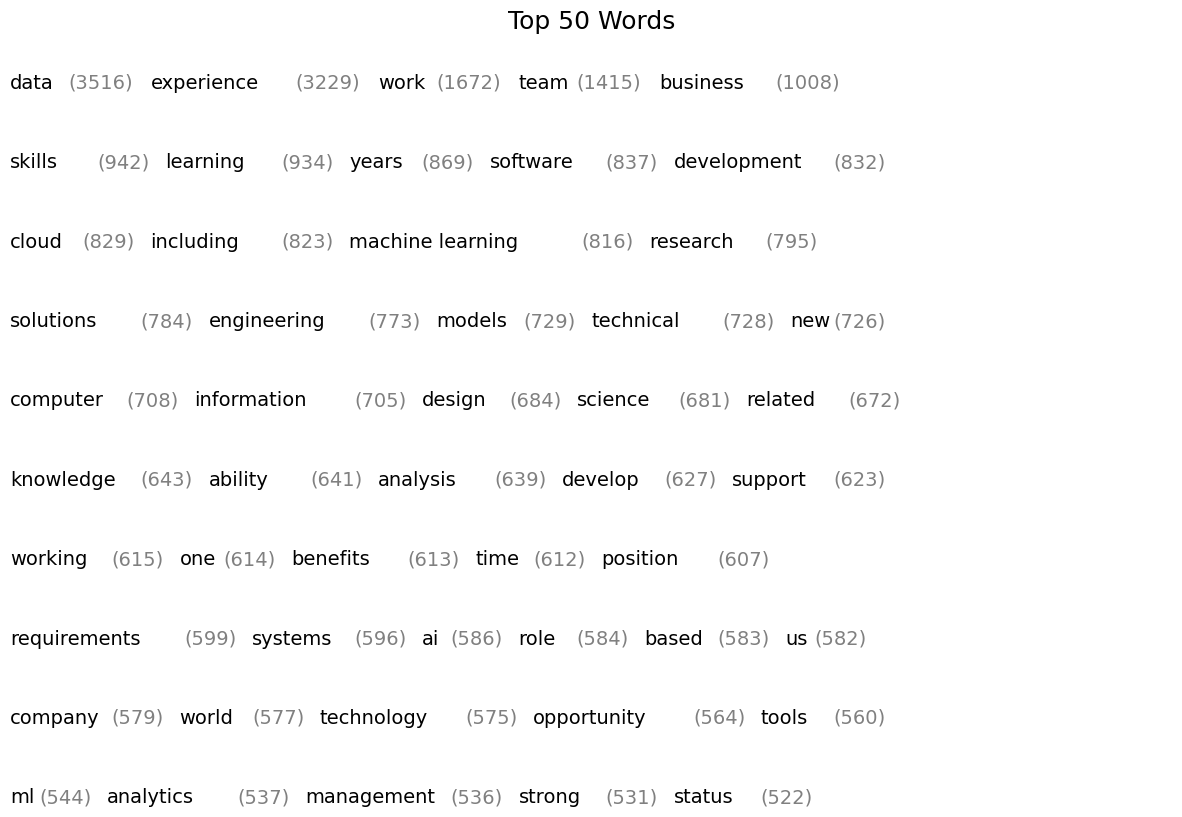

In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

# Assuming you have a pandas DataFrame called 'jobs_results'
# with a column named 'description'

# Custom list of compound phrases
compound_phrases = ['data science', 'machine learning', 'artificial intelligence', 'software development', 'deep learning']

# Function to replace compound phrases with a single token
def replace_compound_phrases(text, phrases):
    for phrase in phrases:
        token = phrase.replace(' ', '_')
        text = text.replace(phrase, token)
    return text

# Function to clean and preprocess text
def preprocess_text(text, compound_phrases):
    # Replace compound phrases with a single token
    text = replace_compound_phrases(text, compound_phrases)

    # Remove special characters and digits
    text = re.sub(r'\W|\d', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return words

# Combine all descriptions into a single list of words
all_words = []
for desc in jobs_results['description']:
    words = preprocess_text(desc, compound_phrases)
    all_words.extend(words)

# Count word frequencies
word_freq = Counter(all_words)

# Sort words by frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Get the top 50 words
top_words = sorted_words[:50]

# Split the top 50 words into rows with similar length
max_row_width = 80
rows = split_words_into_rows(top_words, max_row_width)

# Create the visualization
fig, ax = plt.subplots(figsize=(15, 10))

y = 0
for row in rows[::-1]:
    x = 0
    for word, freq in row:
        word = word.replace('_', ' ')  # Replace '_' back with ' ' for compound phrases
        ax.text(x, y, word, fontsize=14, color='black', ha='left', va='bottom')
        x += len(word) * 14 * 0.6
        ax.text(x, y, f'({freq})', fontsize=14, color='grey', ha='left', va='bottom')
        x += len(str(freq)) * 14 * 0.6 + 14
    y += 20

ax.set_xlim(0, max_row_width * 14 * 0.6)
ax.set_ylim(0, (len(rows) - 1) * 20 + 14)
ax.axis('off')
plt.title('Top 50 Words', fontsize=18)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/victor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/victor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


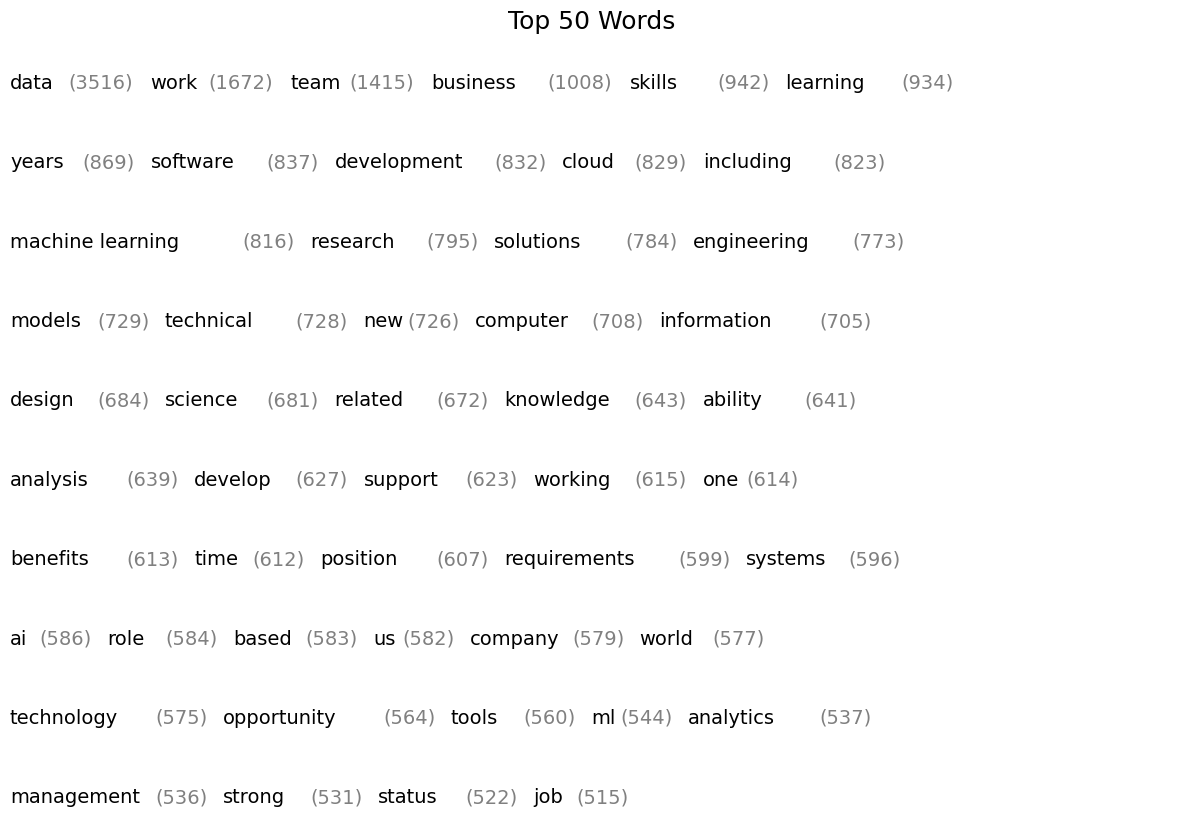

In [11]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

# Assuming you have a pandas DataFrame called 'jobs_results'
# with a column named 'description'

# Custom list of compound phrases
compound_phrases = ['data science', 'machine learning', 'artificial intelligence', 'software development', 'deep learning']

# Custom list of stopwords
custom_stopwords = ['experience']

# Function to replace compound phrases with a single token
def replace_compound_phrases(text, phrases):
    for phrase in phrases:
        token = phrase.replace(' ', '_')
        text = text.replace(phrase, token)
    return text

# Function to clean and preprocess text
def preprocess_text(text, compound_phrases, custom_stopwords):
    # Replace compound phrases with a single token
    text = replace_compound_phrases(text, compound_phrases)

    # Remove special characters and digits
    text = re.sub(r'\W|\d', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english')).union(set(custom_stopwords))
    words = [word for word in words if word not in stop_words]

    return words

# Combine all descriptions into a single list of words
all_words = []
for desc in jobs_results['description']:
    words = preprocess_text(desc, compound_phrases, custom_stopwords)
    all_words.extend(words)

# Count word frequencies
word_freq = Counter(all_words)

# Sort words by frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Get the top 50 words
top_words = sorted_words[:50]

# Split the top 50 words into rows with similar length
max_row_width = 80
rows = split_words_into_rows(top_words, max_row_width)

# Create the visualization
fig, ax = plt.subplots(figsize=(15, 10))

y = 0
for row in rows[::-1]:
    x = 0
    for word, freq in row:
        word = word.replace('_', ' ')  # Replace '_' back with ' ' for compound phrases
        ax.text(x, y, word, fontsize=14, color='black', ha='left', va='bottom')
        x += len(word) * 14 * 0.6
        ax.text(x, y, f'({freq})', fontsize=14, color='grey', ha='left', va='bottom')
        x += len(str(freq)) * 14 * 0.6 + 14
    y += 20

ax.set_xlim(0, max_row_width * 14 * 0.6)
ax.set_ylim(0, (len(rows) - 1) * 20 + 14)
ax.axis('off')
plt.title('Top 50 Words', fontsize=18)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/victor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/victor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


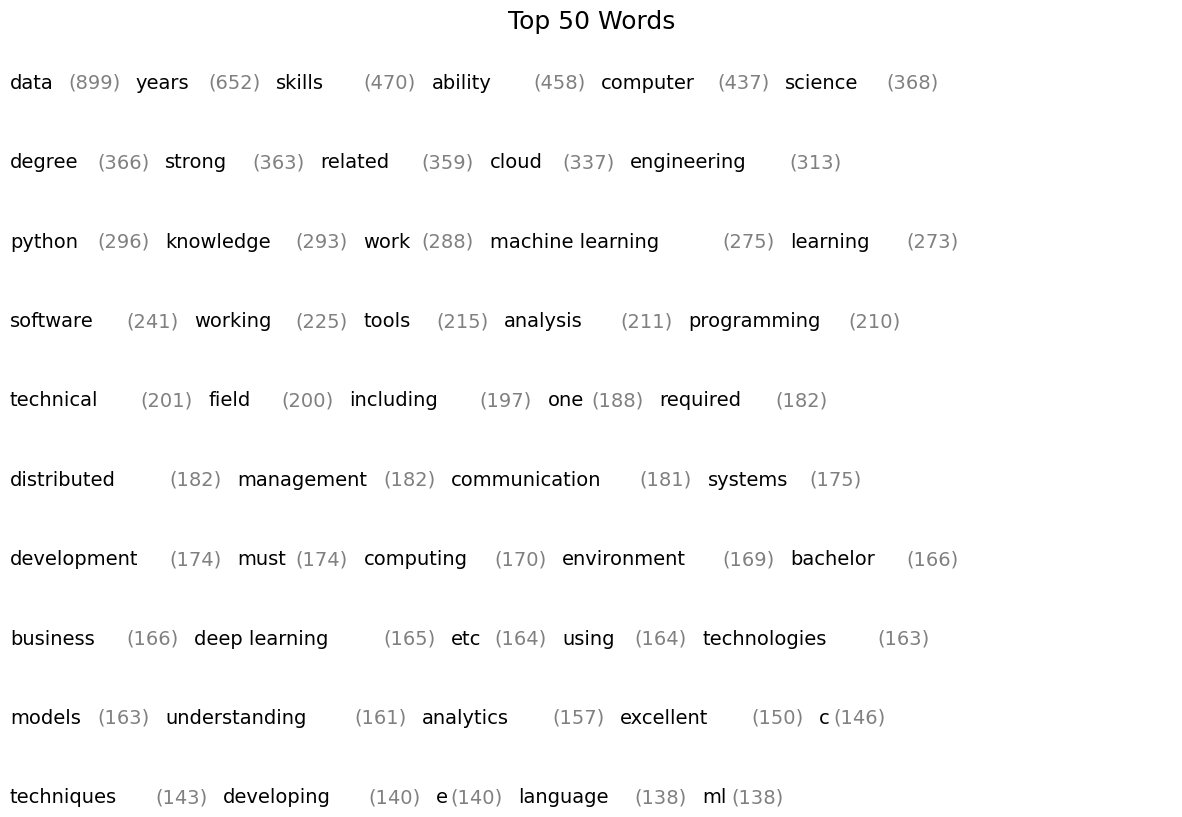

In [14]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

# Assuming you have a pandas DataFrame called 'jobs_results'
# with a column named 'description'

# Custom list of compound phrases
compound_phrases = ['data science', 'machine learning', 'artificial intelligence', 'software development', 'deep learning', 'big data']

# Custom list of stopwords
custom_stopwords = ['experience']

# Function to replace compound phrases with a single token
def replace_compound_phrases(text, phrases):
    for phrase in phrases:
        token = phrase.replace(' ', '_')
        text = text.replace(phrase, token)
    return text

# Function to clean and preprocess text
# Function to clean and preprocess text
def preprocess_text(text, compound_phrases, custom_stopwords):
    if not isinstance(text, str):
        return []

    # Replace compound phrases with a single token
    text = replace_compound_phrases(text, compound_phrases)

    # Remove special characters and digits
    text = re.sub(r'\W|\d', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english')).union(set(custom_stopwords))
    words = [word for word in words if word not in stop_words]

    return words

# Function to split top_words into rows with similar length
def split_words_into_rows(words, max_width):
    rows = []
    row = []
    row_width = 0

    for word, freq in words:
        word_width = len(word) + len(str(freq)) + 4
        if row_width + word_width > max_width:
            rows.append(row)
            row = []
            row_width = 0
        
        row.append((word, freq))
        row_width += word_width

    if row:
        rows.append(row)

    return rows

# Combine all descriptions into a single list of words
all_words = []
for desc in jobs_results['qualifications']:
    words = preprocess_text(desc, compound_phrases, custom_stopwords)
    all_words.extend(words)

# Count word frequencies
word_freq = Counter(all_words)

# Sort words by frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Get the top 50 words
top_words = sorted_words[:50]

# Split the top 50 words into rows with similar length
max_row_width = 80
rows = split_words_into_rows(top_words, max_row_width)

# Create the visualization
fig, ax = plt.subplots(figsize=(15, 10))

y = 0
for row in rows[::-1]:
    x = 0
    for word, freq in row:
        word = word.replace('_', ' ')  # Replace '_' back with ' ' for compound phrases
        ax.text(x, y, word, fontsize=14, color='black', ha='left', va='bottom')
        x += len(word) * 14 * 0.6
        ax.text(x, y, f'({freq})', fontsize=14, color='grey', ha='left', va='bottom')
        x += len(str(freq)) * 14 * 0.6 + 14
    y += 20

ax.set_xlim(0, max_row_width * 14 * 0.6)
ax.set_ylim(0, (len(rows) - 1) * 20 + 14)
ax.axis('off')
plt.title('Top 50 Words', fontsize=18)
plt.show()
